In [83]:
import pandas as pd

In [84]:
!pip install openpyxl


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [85]:
excel_file_path = r'C:\Users\suife_5oofa2g\OneDrive\Desktop\Forage\edgar\Apple.xlsx'
df = pd.read_excel(excel_file_path, engine='openpyxl')


In [86]:
csv_file_path = r'C:\Users\suife_5oofa2g\OneDrive\Desktop\Forage\edgar\Apple.csv'
df.to_csv(csv_file_path, index=False)  # Setting index=False to avoid saving the index as a separate column in the CSV


In [87]:
Apple_df_csv = pd.read_csv(csv_file_path)


In [88]:
print(Apple_df_csv.head())


  Company          Financial Metric     2023    2022     2021
0   Apple             Total revenue   383285  394328  365817 
1   Apple                Net income    96995   99803    94680
2   Apple             Total  assets   352583  352755   351002
3   Apple         Total liabilities   290437  302083   287912
4   Apple  Net cash from operations  110543   122151  104038 


In [89]:
print(Apple_df_csv.head())


  Company          Financial Metric     2023    2022     2021
0   Apple             Total revenue   383285  394328  365817 
1   Apple                Net income    96995   99803    94680
2   Apple             Total  assets   352583  352755   351002
3   Apple         Total liabilities   290437  302083   287912
4   Apple  Net cash from operations  110543   122151  104038 


In [90]:
excel_file_path = r'C:\Users\suife_5oofa2g\OneDrive\Desktop\Forage\edgar\Microsoft.xlsx'
df = pd.read_excel(excel_file_path, engine='openpyxl')


In [91]:
csv_file_path = r'C:\Users\suife_5oofa2g\OneDrive\Desktop\Forage\edgar\Microsoft.csv'
df.to_csv(csv_file_path, index=False)  # Setting index=False to avoid saving the index as a separate column in the CSV


In [92]:
Microsoft_df_csv = pd.read_csv(csv_file_path)


In [93]:
print(Microsoft_df_csv.head())


     Company          Financial Metric    2023    2022    2021
0  Microsoft             Total revenue  211915  198270  168088
1  Microsoft                Net income   72361   72738   61271
2  Microsoft             Total  assets  411976  364840  333779
3  Microsoft         Total liabilities  205753  198298  191791
4  Microsoft  Net cash from operations   87582   89035   76740


In [94]:
excel_file_path = r'C:\Users\suife_5oofa2g\OneDrive\Desktop\Forage\edgar\Telsa.xlsx'
df = pd.read_excel(excel_file_path, engine='openpyxl')


In [95]:
csv_file_path = r'C:\Users\suife_5oofa2g\OneDrive\Desktop\Forage\edgar\Telsa.csv'
df.to_csv(csv_file_path, index=False)  # Setting index=False to avoid saving the index as a separate column in the CSV


In [96]:
Telsa_df_csv = pd.read_csv(csv_file_path)


In [97]:
print(Telsa_df_csv.head())



  Company          Financial Metric    2023    2022   2021
0   Telsa             Total revenue   96773  81462   53823
1   Telsa                Net income   14974   12587   5644
2   Telsa             Total  assets  106618  82338   62131
3   Telsa         Total liabilities  43009    36440  30548
4   Telsa  Net cash from operations   13256  14724   11497


In [98]:
# Convert dictionaries to DataFrames
Tesla_df = pd.DataFrame(Telsa_df_csv)
Microsoft_df = pd.DataFrame(Microsoft_df_csv)
Apple_df = pd.DataFrame(Apple_df_csv)

In [99]:
# Add a 'Company' column to each DataFrame
Tesla_df['Company'] = 'Tesla'
Microsoft_df['Company'] = 'Microsoft'
Apple_df['Company'] = 'Apple'

In [100]:
# Combine all DataFrames into one
combined_df = pd.concat([Tesla_df, Microsoft_df, Apple_df]).reset_index(drop=True)


In [101]:
# Reorder the columns so 'Company' is first
combined_df = combined_df[['Company'] + [col for col in combined_df.columns if col != 'Company']]


In [102]:
combined_df


,Company,Financial Metric,2023,2022,2021
0,Tesla,Total revenue,96773,81462,53823
1,Tesla,Net income,14974,12587,5644
2,Tesla,Total assets,106618,82338,62131
3,Tesla,Total liabilities,43009,36440,30548
4,Tesla,Net cash from operations,13256,14724,11497
5,Microsoft,Total revenue,211915,198270,168088
6,Microsoft,Net income,72361,72738,61271
7,Microsoft,Total assets,411976,364840,333779
8,Microsoft,Total liabilities,205753,198298,191791
9,Microsoft,Net cash from operations,87582,89035,76740


In [103]:
combined_df.to_csv('combined_financial_data.csv', index=False)


In [104]:

df = pd.DataFrame(combined_df)


In [105]:
print (df)

      Company          Financial Metric     2023    2022     2021
0       Tesla             Total revenue    96773  81462     53823
1       Tesla                Net income    14974   12587     5644
2       Tesla             Total  assets   106618  82338     62131
3       Tesla         Total liabilities   43009    36440    30548
4       Tesla  Net cash from operations    13256  14724     11497
5   Microsoft             Total revenue   211915  198270   168088
6   Microsoft                Net income    72361   72738    61271
7   Microsoft             Total  assets   411976  364840   333779
8   Microsoft         Total liabilities   205753  198298   191791
9   Microsoft  Net cash from operations    87582   89035    76740
10      Apple             Total revenue   383285  394328  365817 
11      Apple                Net income    96995   99803    94680
12      Apple             Total  assets   352583  352755   351002
13      Apple         Total liabilities   290437  302083   287912
14      Ap

In [106]:
print(df.dtypes)


Company             object
Financial Metric    object
2023                object
2022                object
2021                object
dtype: object


In [107]:
# Remove commas and convert to float
df['2023'] = df['2023'].replace(',', '').astype(float)
df['2022'] = df['2022'].replace(',', '').astype(float)
df['2021'] = df['2021'].replace(',', '').astype(float)


In [108]:
# Calculate the percentage changes
df['YoY Change 2022 %'] = ((df['2022'] - df['2021']) / df['2021']) * 100
df['YoY Change 2023 %'] = ((df['2023'] - df['2022']) / df['2022']) * 100




In [109]:
# Display the DataFrame with the new columns
df


,Company,Financial Metric,2023,2022,2021,YoY Change 2022 %,YoY Change 2023 %
0,Tesla,Total revenue,96773.0,81462.0,53823.0,51.351653,18.795267
1,Tesla,Net income,14974.0,12587.0,5644.0,123.015592,18.964010
2,Tesla,Total assets,106618.0,82338.0,62131.0,32.523217,29.488207
3,Tesla,Total liabilities,43009.0,36440.0,30548.0,19.287678,18.026894
4,Tesla,Net cash from operations,13256.0,14724.0,11497.0,28.068192,-9.970117
5,Microsoft,Total revenue,211915.0,198270.0,168088.0,17.956071,6.882030
6,Microsoft,Net income,72361.0,72738.0,61271.0,18.715216,-0.518299
7,Microsoft,Total assets,411976.0,364840.0,333779.0,9.305858,12.919636
8,Microsoft,Total liabilities,205753.0,198298.0,191791.0,3.392756,3.759493
9,Microsoft,Net cash from operations,87582.0,89035.0,76740.0,16.021631,-1.631942


In [110]:
# Group by Company and Financial Metric, and then aggregate
grouped = df.groupby(['Company', 'Financial Metric']).agg({
    '2023': ['mean', 'sum'],
    '2022': ['mean', 'sum'],
    '2021': ['mean', 'sum']
})
grouped


2023                2022            \
                                        mean       sum      mean       sum   
Company   Financial Metric                                                   
Apple     Net cash from operations  110543.0  110543.0  122151.0  122151.0   
          Net income                 96995.0   96995.0   99803.0   99803.0   
          Total  assets             352583.0  352583.0  352755.0  352755.0   
          Total liabilities         290437.0  290437.0  302083.0  302083.0   
          Total revenue             383285.0  383285.0  394328.0  394328.0   
Microsoft Net cash from operations   87582.0   87582.0   89035.0   89035.0   
          Net income                 72361.0   72361.0   72738.0   72738.0   
          Total  assets             411976.0  411976.0  364840.0  364840.0   
          Total liabilities         205753.0  205753.0  198298.0  198298.0   
          Total revenue             211915.0  211915.0  198270.0  198270.0   
Tesla     Net cash from operations   13256.0   13256.0   14724.0   14724.0   
          Net income                 14974.0   14974.0   12587.0   12587.0   
          Total  assets             106618.0  106618.0   82338.0   82338.0   
          Total liabilities          43009.0   43009.0   36440.0   36440.0   
          Total revenue              96773.0   96773.0   81462.0   81462.0   

                                        2021            
                                        mean       sum  
Company   Financial Metric                              
Apple     Net cash from operations  104038.0  104038.0  
          Net income                 94680.0   94680.0  
          Total  assets             351002.0  351002.0  
          Total liabilities         287912.0  287912.0  
          Total revenue             365817.0  365817.0  
Microsoft Net cash from operations   76740.0   76740.0  
          Net income                 61271.0   61271.0  
          Total  assets             333779.0  333779.0  
          Total liabilities         191791.0  191791.0  
          Total revenue             168088.0  168088.0  
Tesla     Net cash from operations   11497.0   11497.0  
          Net income                  5644.0    5644.0  
          Total  assets              62131.0   62131.0  
          Total liabilities          30548.0   30548.0  
          Total revenue              53823.0   53823.0

In [111]:
# Reshape DataFrame for grouping by Year
df_melt = df.melt(id_vars=['Company', 'Financial Metric'], var_name='Year', value_name='Value')

# Group by Year and Company to see trends
trends = df_melt.groupby(['Year', 'Company']).agg({
    'Value': ['mean', 'sum', 'std']
})
trends


Value                             
                                      mean           sum            std
Year              Company                                              
2021              Apple      240689.800000  1.203449e+06  132333.017385
                  Microsoft  166333.800000  8.316690e+05  109263.765946
                  Tesla       32728.600000  1.636430e+05   24992.930246
2022              Apple      254224.000000  1.271120e+06  135015.827987
                  Microsoft  184636.200000  9.231810e+05  116733.383636
                  Tesla       45510.200000  2.275510e+05   34506.573695
2023              Apple      246768.600000  1.233843e+06  134842.398031
                  Microsoft  197917.400000  9.895870e+05  136030.073643
                  Tesla       54926.000000  2.746300e+05   44434.784702
YoY Change 2022 % Apple           7.207209  3.603605e+01       6.282598
                  Microsoft      13.078306  6.539153e+01       6.562617
                  Tesla          50.849266  2.542463e+02      42.009482
YoY Change 2023 % Apple          -3.804197 -1.902099e+01       3.484647
                  Microsoft       4.282184  2.141092e+01       5.908881
                  Tesla          15.060852  7.530426e+01      14.770544

In [112]:
import matplotlib.pyplot as plt

In [113]:
import numpy as np


In [114]:
# Filter out non-numeric columns before grouping
numeric_cols = df.select_dtypes(include=[np.number])

In [115]:
# Isolate numeric columns for mean calculation
numeric_cols = df[['Company', '2023', '2022', '2021']]


In [116]:
# Keep the 'Company' column with numeric columns for aggregation
numeric_cols = df[['Company', '2023', '2022', '2021']]

# Now group by 'Company' and calculate the mean
mean_revenue = numeric_cols.groupby('Company').mean()


In [117]:
print(mean_revenue)


               2023      2022      2021
Company                                
Apple      246768.6  254224.0  240689.8
Microsoft  197917.4  184636.2  166333.8
Tesla       54926.0   45510.2   32728.6


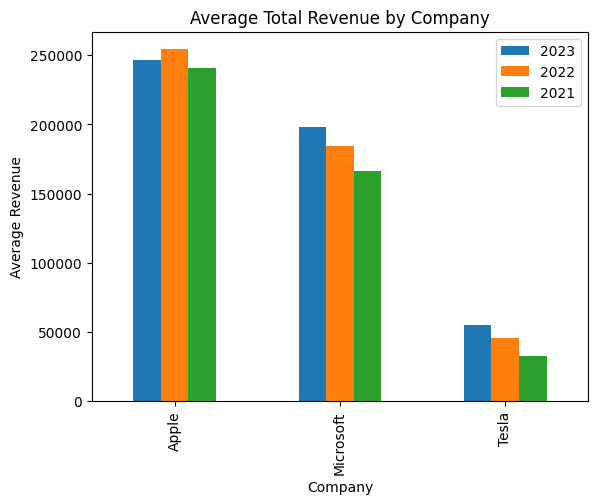

In [118]:
# Plotting the mean total revenue by company for each year
mean_revenue.plot(kind='bar')
plt.title('Average Total Revenue by Company')
plt.ylabel('Average Revenue')
plt.show()

In [119]:
# Save aggregated data to CSV
grouped.to_csv('grouped_data.csv')
trends.to_csv('trends_data.csv')
